**Course website**: https://github.com/leomiquelutti/UFU-geofisica-1

**Note**: This notebook is part of the course "Geofísica 1" of Geology program of the 
[Universidade Federal de Uberlândia](http://www.ufu.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

Agradecimentos especiais ao [Leonardo Uieda](www.leouieda.com)

Esse documento que você está usando é um [Jupyter notebook](http://jupyter.org/). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (números, texto, figuras, videos, etc).

# Gravimetria - modelando a anomalia gravimétrica gerada por prismas e esferas

## Objetivos

* Visualizar a anomalia gravimétrica gerada por esferas.
* Visualizar a anomalia gravimétrica gerada por prismas.
* Verificar como os valores da anomalia variam com a dimensão do corpo.
* Verificar como os valores da anomalia variam com a profundidade do corpo.
* Verificar como os valores da anomalia variam com a densidade do corpo.
* Verificar como as Transformadas atuam nos dados

## Instruções

O notebook te fornecerá exemplos interativos que trabalham os temas abordados no questionário. Utilize esses exemplos para responder as perguntas.

As células com números ao lado, como `In [1]:`, são código [Python](http://python.org/). Algumas dessas células não produzem resultado e servem de preparação para os exemplos interativos. Outras, produzem gráficos interativos. **Você deve executar todas as células, uma de cada vez**, mesmo as que não produzem gráficos.

Para executar uma célula, clique em cima dela e aperte `Shift + Enter`. O foco (contorno verde ou cinza em torno da célula) deverá passar para a célula abaixo. Para rodá-la, aperte `Shift + Enter` novamente e assim por diante. Você pode executar células de texto que não acontecerá nada.

In [1]:
from fatiando import mesher, gridder, utils
from fatiando.gravmag import sphere, prism, transform
from fatiando.mesher import Polygon
from fatiando.vis import mpl
import numpy as np

C:\Users\leomi\Anaconda2\lib\site-packages\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Modelo
A célula abaixo contém o modelo de **prismas** definidos pelo usuário. 

In [2]:
def prism2polygon(prism):
    vertices = [[prism.x1, prism.y1],
               [prism.x2, prism.y1],
               [prism.x2, prism.y2],
               [prism.x1, prism.y2]]
    return vertices

In [33]:
model = [mesher.Prism(-4000, -3000, -4000, -3000, 0, 2000, {'density': 1000}),
         mesher.Prism(-1000, 1000, -1000, 1000, 0, 2000, {'density': -1000}),
         mesher.Prism(2000, 4000, 3000, 4000, 0, 2000, {'density': 1000}),
         mesher.Prism(-2900, -3100, 2900, 3100, 0, 100, {'density': 1300})]
pol = np.empty(model.__len__(), dtype=object)
for i in range(model.__len__()):
    pol[i] = Polygon(prism2polygon(model[i]))

**Altere-os e execute novamente o programa para observar como o resultado se comporta**. 

Tente adicionar prismas com parâmetros diferentes, lembrando que 

`mesher.Prism(x1, x2, y1, y2, z1, z2, {'density': -1000})`

Documentação para `mesher.prism` [aqui](https://www.fatiando.org/api/mesher.html#fatiando.mesher.Prism). 

A célula abaixo define um grid e calcula a anomalia de acordo com os parâmetros do usuário.

In [34]:
# Create a regular grid at 150 m height
shape = (100, 100)
xp, yp, zp = gridder.regular((-5000, 5000, -5000, 5000), shape, z=-1)
fields = [prism.potential(xp, yp, zp, model),
          prism.gx(xp, yp, zp, model),
          prism.gy(xp, yp, zp, model),
          prism.gz(xp, yp, zp, model),
          prism.gxx(xp, yp, zp, model),
          prism.gxy(xp, yp, zp, model),
          prism.gxz(xp, yp, zp, model),
          prism.gyy(xp, yp, zp, model),
          prism.gyz(xp, yp, zp, model),
          prism.gzz(xp, yp, zp, model)]

A célula abaixo cria a imagem da _anomalia de campo total_.

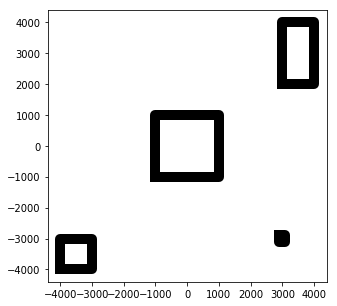

In [35]:
# Plot position
mpl.figure(figsize=(5, 5))
for i in range(pol.__len__()):
        mpl.polygon(pol[i], '-k', linewidth=10, xy2ne=True)

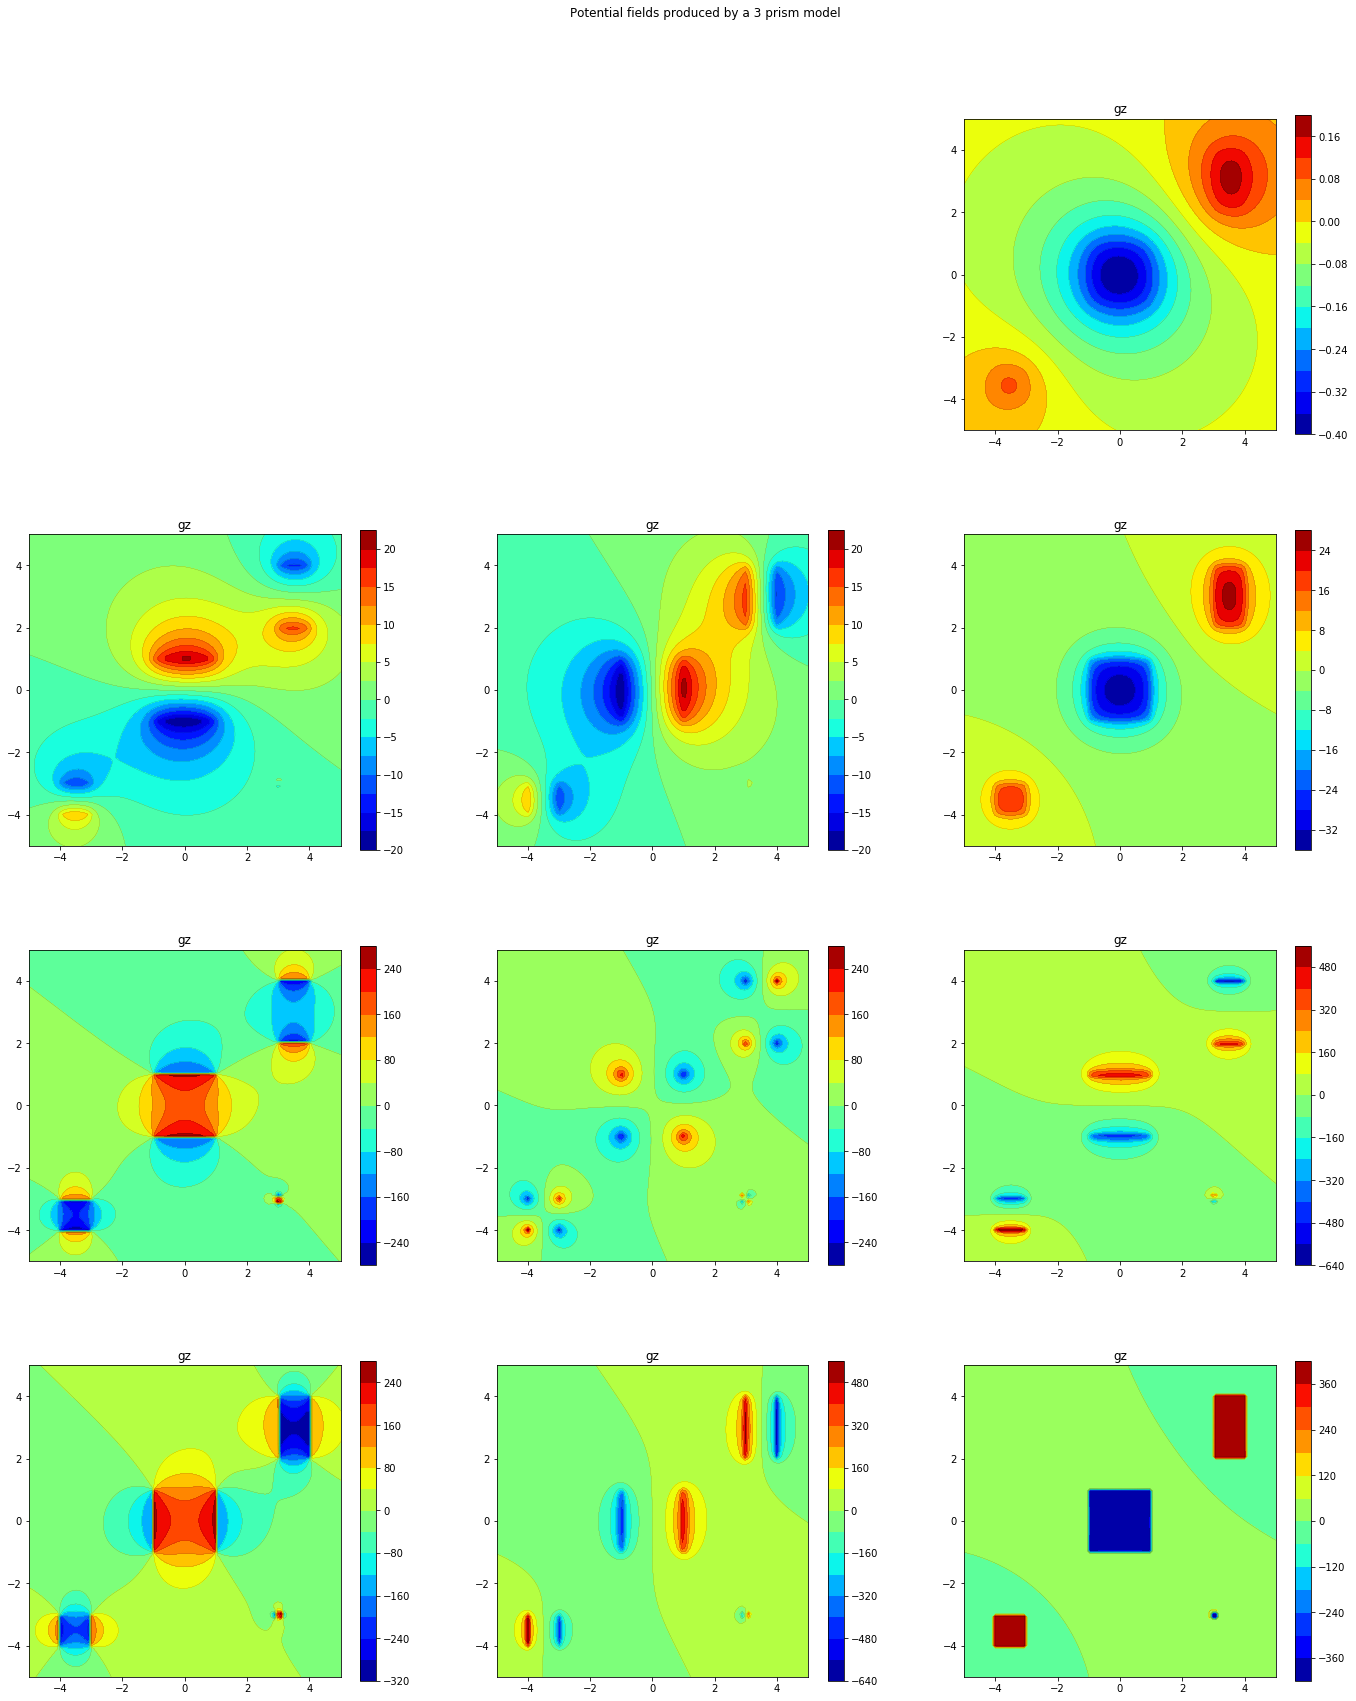

In [36]:
# Plot
titles = ['potential', 'gx', 'gy', 'gz',
          'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz']
mpl.figure(figsize=(20, 25))
mpl.subplots_adjust(left=0.03, right=0.95, bottom=0.05, top=0.92, hspace=0.3)
mpl.suptitle("Potential fields produced by a 3 prism model")
for i, field in enumerate(fields):
    mpl.subplot(4, 3, i + 3)
    for i in range(pol.__len__()):
        mpl.polygon(pol[i], '-k', linewidth=10, xy2ne=True)
    mpl.axis('scaled')
    mpl.title(titles[i])
    levels = mpl.contourf(yp * 0.001, xp * 0.001, field, shape, 15)
    cb = mpl.colorbar()
    mpl.contour(yp * 0.001, xp * 0.001, field, shape, levels, clabel=False, linewidth=0.1)
mpl.show()

As células abaixo calculam as __derivadas__ do campo nas direções __x__, __y__ e __z__ e então plotam

In [37]:
tf = fields[3]
tfx = transform.derivx(xp, yp, tf, shape)
tfy = transform.derivy(xp, yp, tf, shape)
tfz = transform.derivz(xp, yp, tf, shape)

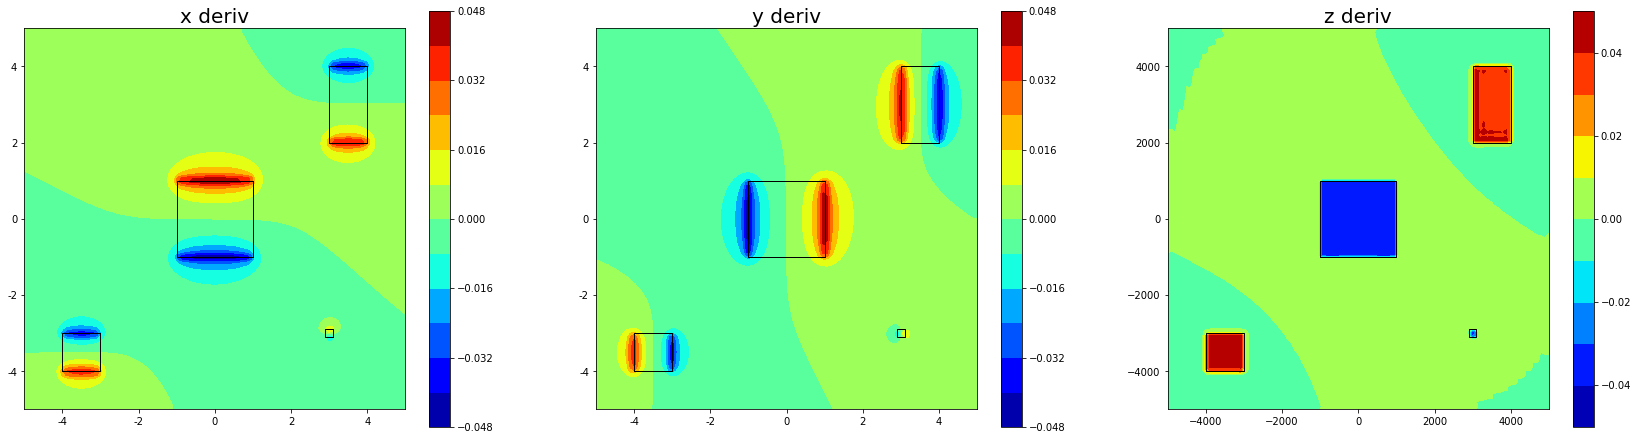

In [38]:
# Plot
mpl.figure(figsize=(25, 10))
mpl.subplots_adjust(top=0.95, left=0.05, right=0.95)
mpl.subplot(1, 3, 1)
mpl.title("x deriv", fontsize=20)
mpl.axis('scaled')
levels = mpl.contourf(yp, xp, tfx, shape, 12)
mpl.colorbar(shrink=0.7)
for i in range(pol.__len__()):
    mpl.polygon(pol[i], '-k', xy2ne=True)
#mpl.contour(yp, xp, gxz, shape, 12, color='k')
mpl.m2km()
mpl.subplot(1, 3, 2)
mpl.title("y deriv", fontsize=20)
mpl.axis('scaled')
levels = mpl.contourf(yp, xp, tfy, shape, 12)
mpl.colorbar(shrink=0.7)
#mpl.contour(yp, xp, gyz, shape, 12, color='k')
for i in range(pol.__len__()):
    mpl.polygon(pol[i], '-k', xy2ne=True)
mpl.m2km()
mpl.subplot(1, 3, 3)
mpl.title("z deriv", fontsize=20)
mpl.axis('scaled')
levels = mpl.contourf(yp, xp, tfz, shape, 8)
mpl.colorbar(shrink=0.7)
for i in range(pol.__len__()):
    mpl.polygon(pol[i], '-k', xy2ne=True)
#mpl.contour(yp, xp, gzz, shape, levels, color='k')
mpl.show()

As células abaixo calculam a __continuação para cima__ do campo e então plotam

In [39]:
height = 1000  # How much higher to go
tfcontf = transform.upcontinue(xp, yp, tf, shape, height)
gz_true = prism.gz(xp, yp, zp - height, model)

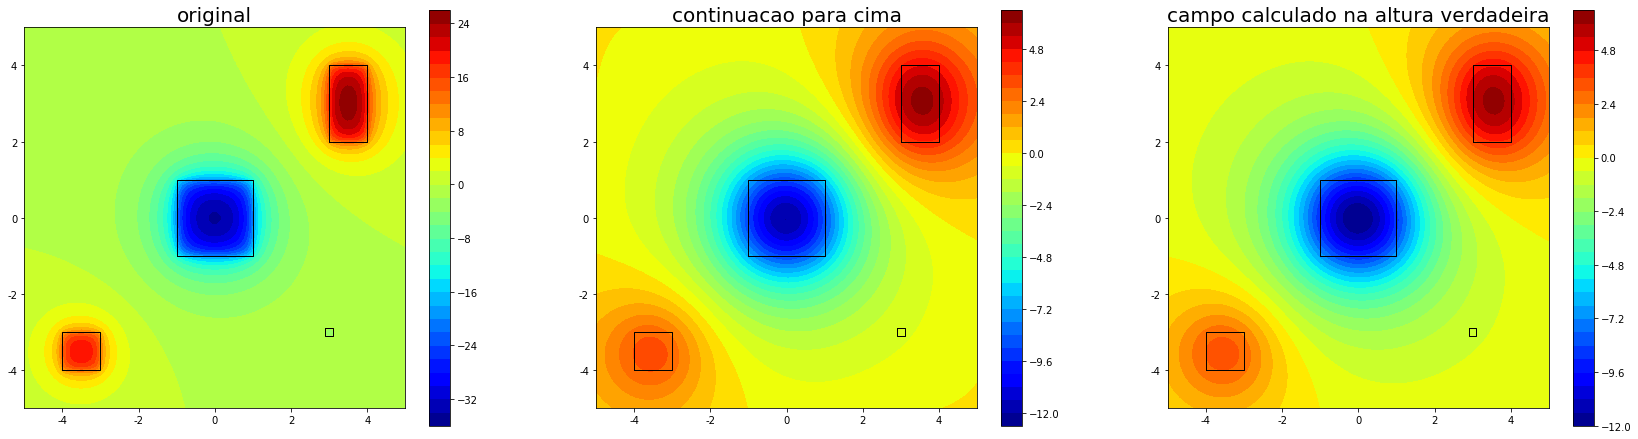

In [40]:
# Plot
mpl.figure(figsize=(25, 10))
mpl.subplots_adjust(top=0.95, left=0.05, right=0.95)
mpl.subplot(1, 3, 1)
mpl.title("original", fontsize=20)
mpl.axis('scaled')
levels = mpl.contourf(yp, xp, tf, shape, 30)
mpl.colorbar(shrink=0.7)
for i in range(pol.__len__()):
    mpl.polygon(pol[i], '-k', xy2ne=True)
#mpl.contour(yp, xp, gxz, shape, 12, color='k')
mpl.m2km()
mpl.subplot(1, 3, 2)
mpl.title("continuacao para cima", fontsize=20)
mpl.axis('scaled')
levels = mpl.contourf(yp, xp, tfcontf, shape, 30)
mpl.colorbar(shrink=0.7)
for i in range(pol.__len__()):
    mpl.polygon(pol[i], '-k', xy2ne=True)
#mpl.contour(yp, xp, gyz, shape, 12, color='k')
mpl.m2km()
mpl.subplot(1, 3, 3)
mpl.title("campo calculado na altura verdadeira", fontsize=20)
mpl.axis('scaled')
levels = mpl.contourf(yp, xp, gz_true, shape, 30)
mpl.colorbar(shrink=0.7)
for i in range(pol.__len__()):
    mpl.polygon(pol[i], '-k', xy2ne=True)
#mpl.contour(yp, xp, gyz, shape, 12, color='k')
mpl.m2km()

As células abaixo calculam a __amplitude do gradiente total__ (também chamado de __sinal analítico__) do campo e então plotam

In [28]:
total_grad_amp = transform.tga(xp, yp, tf, shape)

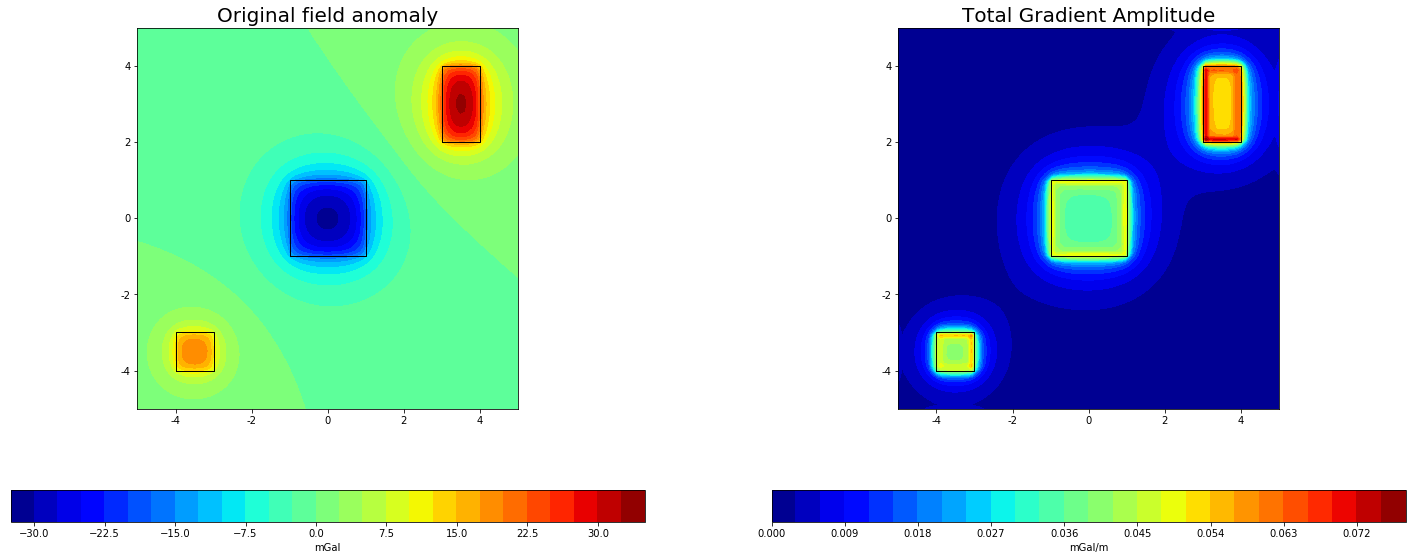

In [32]:
#Plot
mpl.figure(figsize=(25, 10))
mpl.subplot(1, 2, 1)
mpl.title("Original field anomaly", fontsize=20)
mpl.axis('scaled')
#mpl.contourf(yp, xp, tf, shape, 30, cmap=mpl.cm.RdBu_r)
mpl.contourf(yp, xp, tf, shape, 30)
mpl.colorbar(orientation='horizontal').set_label('mGal')
for i in range(pol.__len__()):
    mpl.polygon(pol[i], '-k', xy2ne=True)
mpl.m2km()
mpl.subplot(1, 2, 2)
mpl.title("Total Gradient Amplitude", fontsize=20)
mpl.axis('scaled')
#mpl.contourf(yp, xp, total_grad_amp, shape, 30, cmap=mpl.cm.RdBu_r)
mpl.contourf(yp, xp, total_grad_amp, shape, 30)
mpl.colorbar(orientation='horizontal').set_label('mGal/m')
for i in range(pol.__len__()):
    mpl.polygon(pol[i], '-k', xy2ne=True)
mpl.m2km()
mpl.show()